# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#7b6b59;overflow:hidden">Predictor</div>


- Load your model & vectorizer
- Use model to predict

In [1]:
model_pathSVC = 'SVC_91_accuracy/SVC_.pkl'
vectorizer_pathSVC = 'SVC_91_accuracy/vectorizer.pkl'
X_test_pathSVC = 'SVC_91_accuracy/X_test.pkl'
y_test_pathSVC = 'SVC_91_accuracy/y_test.pkl'

model_pathNB = 'NB_89_accuracy/NB_.pkl'
vectorizer_pathNB = 'NB_89_accuracy/vectorizer.pkl'
X_test_pathNB = 'NB_89_accuracy/X_test.pkl'
y_test_pathNB = 'NB_89_accuracy/y_test.pkl'

Overall accuracy model:
Accuracy  = 90.71%
Precision = 90.68%
Recall    = 90.71%
F1-score  = 90.69%

Accuracy model for each label:
Algebra       = 86.30%
Combinatorics = 88.89%
Geometry      = 97.73%
Number Theory = 88.15%


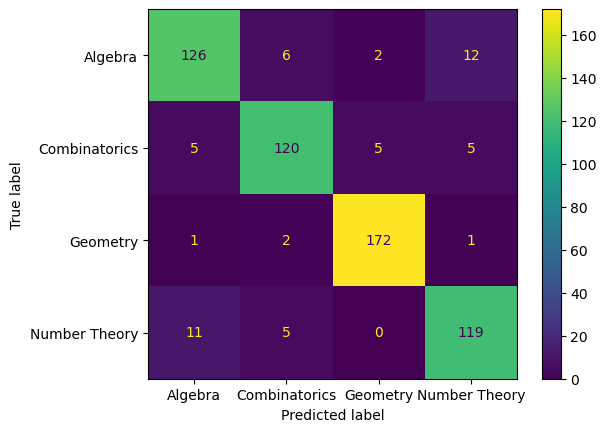

Overall accuracy model:
Accuracy  = 89.19%
Precision = 89.32%
Recall    = 89.19%
F1-score  = 89.10%

Accuracy model for each label:
Algebra       = 90.41%
Combinatorics = 83.70%
Geometry      = 98.86%
Number Theory = 80.74%


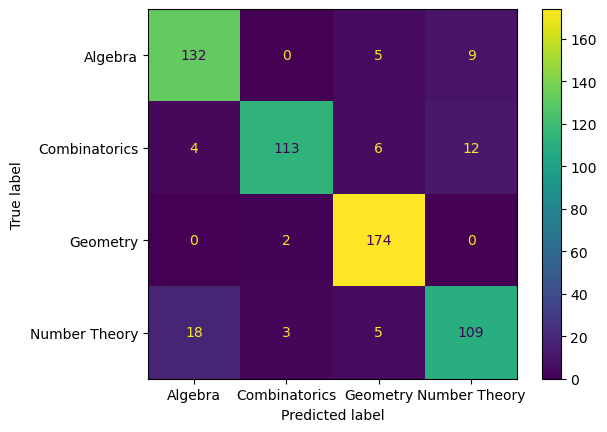

In [2]:
import pandas as pd
import pickle

def load_pkl(name: str):
    if len(name) == 0:
        raise ValueError("Filename cannot be empty")

    with open(name, 'rb') as file:
        return pickle.load(file)

def model_information(model, X_test, y_test):
    import numpy as np
    import matplotlib.pyplot as plt
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Overall accuracy model:")
    print(f"Accuracy  = {accuracy*100:<.2f}%")
    print(f"Precision = {precision*100:<.2f}%")
    print(f"Recall    = {recall*100:<.2f}%")
    print(f"F1-score  = {f1*100:<.2f}%\n")
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    heatmap = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    labels = np.unique(y_test)

    print("Accuracy model for each label:")
    for label in labels:
        idx = np.where(model.classes_ == label)[0][0]
        label_accuracy = cm[idx, idx] / np.sum(cm[idx, :])
        print(f"{label:<14s}= {label_accuracy*100:.2f}%")

    heatmap.plot()
    plt.show()
    
# Read dataset
df = pd.read_csv('../data/imo.csv')
# df_isnull = df[df['label'].isnull()]
# df_isnull.reset_index(drop=True, inplace=True)

modelSVC = load_pkl(model_pathSVC)
vectorizerSVC = load_pkl(vectorizer_pathSVC)

modelNB = load_pkl(model_pathNB)
vectorizerNB = load_pkl(vectorizer_pathNB)

model_information(modelSVC, load_pkl(X_test_pathSVC), load_pkl(y_test_pathSVC))
model_information(modelNB, load_pkl(X_test_pathNB), load_pkl(y_test_pathNB))


In [3]:
def predict(model, vectorizer, teks_soal):
    sample = [str(teks_soal)]
    processed = vectorizer.transform(sample)
    pred = model.predict_proba(processed)

    class_labels = model.classes_
    class_probabilities = {class_labels[i]: pred[0][i] * 100 for i in range(len(class_labels))}
    # print(class_probabilities)

    sorted_class_probabilities = {label: class_probabilities[label] for label in ['Algebra', 'Combinatorics', 'Geometry', 'Number Theory']}
    # print(sorted_class_probabilities)

    for label, prob in zip(class_labels, pred[0]):
        print(f"{label:<14s}= {prob*100:.2f}%")
    print()
    

In [4]:
while True:
    x = int(input("id_key: "))
    teks_soal = df[df['id_key'] == x].iloc[0, :].post_canonical
    print(f"{x}. {teks_soal}")

    print("SVC")
    predict(modelSVC, vectorizerSVC, teks_soal)
    print("NB")
    predict(modelNB, vectorizerNB, teks_soal)
    print("------------------------------------------------------------------")


3652. Find the largest positive integer $N$ so that the number of integers in the set $\{1,2,\dots,N\}$ which are divisible by 3 is equal to the number of integers which are divisible by 5 or 7 (or both).
SVC
Algebra       = 0.03%
Combinatorics = 2.48%
Geometry      = 0.00%
Number Theory = 97.48%

NB
Algebra       = 3.90%
Combinatorics = 13.09%
Geometry      = 0.69%
Number Theory = 82.32%

------------------------------------------------------------------
3704. During a break, $n$ children at school sit in a circle around their teacher to play a game. The teacher walks clockwise close to the children and hands out candies to some of them according to the following rule:  He selects one child and gives him a candy, then he skips the next child and gives a candy to the next one, then he skips 2 and gives a candy to the next one, then he skips 3, and so on.  Determine the values of $n$ for which eventually, perhaps after many rounds, all children will have at least one candy each.
SVC
Alg

ValueError: invalid literal for int() with base 10: ''